In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Flatten, Dense, Dropout, RNN, Input, TimeDistributed, Bidirectional
import matplotlib.pyplot as plt

In [2]:
lst = np.load("dataset.npz")

In [3]:
print(len(list(lst)))

6


In [4]:
print(list(lst.keys()))

['x_train', 'y_train', 'x_test', 'y_test', 'box_train', 'box_test']


In [5]:
x_train = lst['x_train']
y_train = lst['y_train']
x_test = lst['x_test']
y_test = lst['y_test']
box_train = lst['box_train']
box_test = lst['box_test']

In [6]:
print(x_train.shape)
print(y_train.shape)
print(box_train.shape)
print(x_test.shape)

(10597, 120, 34)
(10597, 120, 17)
(10597, 4)
(1178, 120, 34)


In [7]:
print(x_train.shape, y_train.shape)

(10597, 120, 34) (10597, 120, 17)


In [8]:
print(x_test.shape, y_test.shape)

(1178, 120, 34) (1178, 120, 17)


In [9]:
print(box_train.shape, box_test.shape)

(10597, 4) (1178, 4)


In [10]:
y_train[0].shape

(120, 17)

In [11]:
y_train[0,:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

In [12]:
y_train.shape

(10597, 120, 17)

In [13]:
print(x_train.shape, y_train.shape)

(10597, 120, 34) (10597, 120, 17)


In [14]:
print(x_test.shape, y_test.shape)

(1178, 120, 34) (1178, 120, 17)


In [15]:
#y_train = np.argmax(y_train, axis = 2)
print(y_train.shape)

(10597, 120, 17)


In [16]:
y_test.shape

(1178, 120, 17)

In [17]:
#y_test = np.argmax(y_test, axis=2)

print(y_test.shape)

(1178, 120, 17)


In [18]:
y_train[0]

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# model 구축

In [19]:
xInput = Input(batch_shape=(None,120,34))
xBiLstm = Bidirectional(LSTM(17, return_sequences=True), merge_mode='concat')(xInput)
xOutput = TimeDistributed(Dense(17))(xBiLstm)
model = Model(xInput, xOutput)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 34)]         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 120, 34)           7072      
_________________________________________________________________
time_distributed (TimeDistri (None, 120, 17)           595       
Total params: 7,667
Trainable params: 7,667
Non-trainable params: 0
_________________________________________________________________


In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'accuracy'])
#early_stop = EarlyStopping(monitor='val_loss', patience=5)
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, batch_size=64, verbose=1)

Epoch 1/1000
166/166 [==============================] - 7s 32ms/step - loss: 0.0555 - mae: 0.1377 - accuracy: 0.4435 - val_loss: 0.0330 - val_mae: 0.0868 - val_accuracy: 0.5864
Epoch 2/1000
166/166 [==============================] - 4s 27ms/step - loss: 0.0320 - mae: 0.0839 - accuracy: 0.5928 - val_loss: 0.0295 - val_mae: 0.0784 - val_accuracy: 0.6267
Epoch 3/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0290 - mae: 0.0760 - accuracy: 0.6272 - val_loss: 0.0282 - val_mae: 0.0737 - val_accuracy: 0.6390
Epoch 4/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0279 - mae: 0.0725 - accuracy: 0.6392 - val_loss: 0.0273 - val_mae: 0.0710 - val_accuracy: 0.6472
Epoch 5/1000
166/166 [==============================] - 5s 27ms/step - loss: 0.0270 - mae: 0.0692 - accuracy: 0.6502 - val_loss: 0.0268 - val_mae: 0.0664 - val_accuracy: 0.6498
Epoch 6/1000
166/166 [==============================] - 4s 27ms/step - loss: 0.0265 - mae: 0.0669 - accuracy: 0.652

166/166 [==============================] - 4s 26ms/step - loss: 0.0202 - mae: 0.0482 - accuracy: 0.7486 - val_loss: 0.0208 - val_mae: 0.0486 - val_accuracy: 0.7451
Epoch 48/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0202 - mae: 0.0480 - accuracy: 0.7500 - val_loss: 0.0202 - val_mae: 0.0482 - val_accuracy: 0.7515
Epoch 49/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0198 - mae: 0.0474 - accuracy: 0.7555 - val_loss: 0.0201 - val_mae: 0.0479 - val_accuracy: 0.7535
Epoch 50/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0200 - mae: 0.0478 - accuracy: 0.7522 - val_loss: 0.0202 - val_mae: 0.0472 - val_accuracy: 0.7519
Epoch 51/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0199 - mae: 0.0473 - accuracy: 0.7546 - val_loss: 0.0198 - val_mae: 0.0475 - val_accuracy: 0.7574
Epoch 52/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0199 - mae: 0.0474 - accuracy: 0.7536 - val_

166/166 [==============================] - 4s 26ms/step - loss: 0.0190 - mae: 0.0454 - accuracy: 0.7660 - val_loss: 0.0192 - val_mae: 0.0449 - val_accuracy: 0.7646
Epoch 94/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0190 - mae: 0.0451 - accuracy: 0.7661 - val_loss: 0.0191 - val_mae: 0.0459 - val_accuracy: 0.7654
Epoch 95/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0187 - mae: 0.0448 - accuracy: 0.7696 - val_loss: 0.0191 - val_mae: 0.0453 - val_accuracy: 0.7683
Epoch 96/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0189 - mae: 0.0450 - accuracy: 0.7685 - val_loss: 0.0190 - val_mae: 0.0456 - val_accuracy: 0.7675
Epoch 97/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0187 - mae: 0.0448 - accuracy: 0.7723 - val_loss: 0.0193 - val_mae: 0.0460 - val_accuracy: 0.7656
Epoch 98/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0190 - mae: 0.0453 - accuracy: 0.7676 - val_

Epoch 139/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0187 - mae: 0.0446 - accuracy: 0.7723 - val_loss: 0.0188 - val_mae: 0.0448 - val_accuracy: 0.7699
Epoch 140/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0185 - mae: 0.0440 - accuracy: 0.7731 - val_loss: 0.0188 - val_mae: 0.0454 - val_accuracy: 0.7710
Epoch 141/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0183 - mae: 0.0439 - accuracy: 0.7769 - val_loss: 0.0190 - val_mae: 0.0459 - val_accuracy: 0.7664
Epoch 142/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0184 - mae: 0.0442 - accuracy: 0.7753 - val_loss: 0.0188 - val_mae: 0.0440 - val_accuracy: 0.7703
Epoch 143/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0184 - mae: 0.0439 - accuracy: 0.7747 - val_loss: 0.0189 - val_mae: 0.0440 - val_accuracy: 0.7702
Epoch 144/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0186 - mae: 0.0442 - acc

Epoch 185/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0183 - mae: 0.0436 - accuracy: 0.7783 - val_loss: 0.0188 - val_mae: 0.0445 - val_accuracy: 0.7692
Epoch 186/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0181 - mae: 0.0434 - accuracy: 0.7799 - val_loss: 0.0183 - val_mae: 0.0441 - val_accuracy: 0.7774
Epoch 187/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0180 - mae: 0.0430 - accuracy: 0.7812 - val_loss: 0.0186 - val_mae: 0.0447 - val_accuracy: 0.7745
Epoch 188/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0181 - mae: 0.0434 - accuracy: 0.7804 - val_loss: 0.0182 - val_mae: 0.0435 - val_accuracy: 0.7784
Epoch 189/1000
166/166 [==============================] - 4s 27ms/step - loss: 0.0180 - mae: 0.0431 - accuracy: 0.7812 - val_loss: 0.0187 - val_mae: 0.0446 - val_accuracy: 0.7725
Epoch 190/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0180 - mae: 0.0432 - acc

Epoch 231/1000
166/166 [==============================] - 5s 27ms/step - loss: 0.0179 - mae: 0.0429 - accuracy: 0.7830 - val_loss: 0.0180 - val_mae: 0.0429 - val_accuracy: 0.7803
Epoch 232/1000
166/166 [==============================] - 5s 27ms/step - loss: 0.0176 - mae: 0.0423 - accuracy: 0.7862 - val_loss: 0.0184 - val_mae: 0.0438 - val_accuracy: 0.7739
Epoch 233/1000
166/166 [==============================] - 4s 27ms/step - loss: 0.0179 - mae: 0.0430 - accuracy: 0.7814 - val_loss: 0.0188 - val_mae: 0.0445 - val_accuracy: 0.7697
Epoch 234/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0179 - mae: 0.0430 - accuracy: 0.7822 - val_loss: 0.0180 - val_mae: 0.0434 - val_accuracy: 0.7814
Epoch 235/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0177 - mae: 0.0425 - accuracy: 0.7850 - val_loss: 0.0182 - val_mae: 0.0435 - val_accuracy: 0.7786
Epoch 236/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0179 - mae: 0.0429 - acc

Epoch 277/1000
166/166 [==============================] - 5s 27ms/step - loss: 0.0176 - mae: 0.0423 - accuracy: 0.7864 - val_loss: 0.0179 - val_mae: 0.0429 - val_accuracy: 0.7830
Epoch 278/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0174 - mae: 0.0418 - accuracy: 0.7894 - val_loss: 0.0179 - val_mae: 0.0426 - val_accuracy: 0.7817
Epoch 279/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0177 - mae: 0.0424 - accuracy: 0.7856 - val_loss: 0.0180 - val_mae: 0.0431 - val_accuracy: 0.7820
Epoch 280/1000
166/166 [==============================] - 4s 27ms/step - loss: 0.0177 - mae: 0.0423 - accuracy: 0.7844 - val_loss: 0.0181 - val_mae: 0.0437 - val_accuracy: 0.7804
Epoch 281/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0174 - mae: 0.0420 - accuracy: 0.7880 - val_loss: 0.0181 - val_mae: 0.0436 - val_accuracy: 0.7818
Epoch 282/1000
166/166 [==============================] - 4s 26ms/step - loss: 0.0175 - mae: 0.0421 - acc

Epoch 323/1000
166/166 [==============================] - 5s 28ms/step - loss: 0.0177 - mae: 0.0427 - accuracy: 0.7854 - val_loss: 0.0181 - val_mae: 0.0429 - val_accuracy: 0.7792
Epoch 324/1000
166/166 [==============================] - 5s 29ms/step - loss: 0.0173 - mae: 0.0417 - accuracy: 0.7913 - val_loss: 0.0178 - val_mae: 0.0432 - val_accuracy: 0.7839
Epoch 325/1000
166/166 [==============================] - 5s 29ms/step - loss: 0.0174 - mae: 0.0421 - accuracy: 0.7879 - val_loss: 0.0180 - val_mae: 0.0426 - val_accuracy: 0.7805
Epoch 326/1000
166/166 [==============================] - 5s 28ms/step - loss: 0.0175 - mae: 0.0421 - accuracy: 0.7864 - val_loss: 0.0178 - val_mae: 0.0424 - val_accuracy: 0.7849
Epoch 327/1000
166/166 [==============================] - 5s 27ms/step - loss: 0.0173 - mae: 0.0416 - accuracy: 0.7903 - val_loss: 0.0179 - val_mae: 0.0429 - val_accuracy: 0.7825
Epoch 328/1000
166/166 [==============================] - 5s 28ms/step - loss: 0.0174 - mae: 0.0419 - acc

Epoch 369/1000
166/166 [==============================] - 5s 28ms/step - loss: 0.0171 - mae: 0.0414 - accuracy: 0.7920 - val_loss: 0.0179 - val_mae: 0.0426 - val_accuracy: 0.7803
Epoch 370/1000
166/166 [==============================] - 5s 28ms/step - loss: 0.0175 - mae: 0.0420 - accuracy: 0.7884 - val_loss: 0.0179 - val_mae: 0.0427 - val_accuracy: 0.7828
Epoch 371/1000
166/166 [==============================] - 5s 28ms/step - loss: 0.0172 - mae: 0.0415 - accuracy: 0.7911 - val_loss: 0.0181 - val_mae: 0.0422 - val_accuracy: 0.7801
Epoch 372/1000
166/166 [==============================] - 5s 28ms/step - loss: 0.0174 - mae: 0.0419 - accuracy: 0.7871 - val_loss: 0.0178 - val_mae: 0.0421 - val_accuracy: 0.7830
Epoch 373/1000
166/166 [==============================] - 5s 27ms/step - loss: 0.0172 - mae: 0.0415 - accuracy: 0.7905 - val_loss: 0.0178 - val_mae: 0.0428 - val_accuracy: 0.7858
Epoch 374/1000
166/166 [==============================] - 5s 27ms/step - loss: 0.0173 - mae: 0.0416 - acc

KeyboardInterrupt: 

In [83]:
pred = model.predict(x_test, batch_size=1)

ValueError: x and y can be no greater than 2-D, but have shapes (1152,) and (1152, 120, 17)

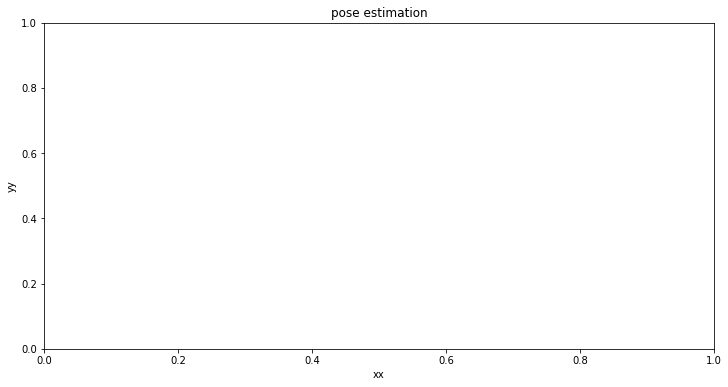

In [85]:
plt.figure(figsize=(12,6))
plt.title('pose estimation')
plt.ylabel('yy')
plt.xlabel('xx')
plt.plot(y_test, label='actual', color = 'red')
plt.plot(pred, label='prediction', color = 'green')
plt.grid()
plt.legend()

plt.show()